Лабораторна робота №2
Студента СА-43
Мозоля Назарія

Базовий код попердньої лаби

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, confusion_matrix
import time
import os
import pickle
# from google.colab import drive
# drive.mount('/content/drive')




# Checks for available GPUs and lists them
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Set TensorFlow to use only the first GPU
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

2024-03-18 18:23:19.606246: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 18:23:19.606292: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 18:23:19.607171: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-18 18:23:19.614603: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-18 18:23:20.526496: W tensorflow/compiler/tf2

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [ ]:
x_train.shape # (50000, 32, 32, 3)
y_train.shape # (50000, 1)

(50000, 1)

In [ ]:
x_train = x_train.astype('float') / 255
x_test = x_test.astype('float') / 255

In [ ]:
id2class = {
    idx: name for idx, name in enumerate([
        'airplane', 'automobile', 'bird',
        'cat', 'deer', 'dog', 'frog',
        'horse', 'ship', 'truck'
    ])
}
print(id2class)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [ ]:
def display_cifar_images(
    x: np.ndarray,
    y: np.ndarray,
    id2class: dict[int, str],
    n: int = 4
):
    random_images_indices = np.random.randint(0, x.shape[0], n)
    images = x[random_images_indices]
    classes = [id2class[y[idx, 0]] for idx in random_images_indices]


    f, axs = plt.subplots(1, n, figsize=((3*n, 3)))
    for image, name, ax in zip(images, classes, axs):
        ax.imshow(image)
        ax.axis('off')
        ax.set(title=f"Class: {name}")
    plt.show()

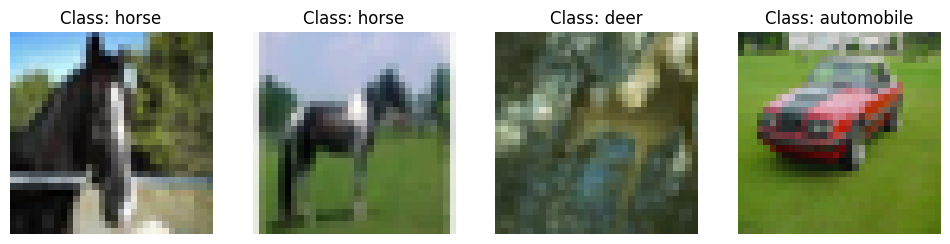

In [ ]:
display_cifar_images(x_train, y_train, id2class)

In [ ]:
@keras.utils.register_keras_serializable()
class NNClassifier(tf.keras.Model):
    """Image classifier with fully-connected layers"""
    def __init__(self, hidden_dim: int, n_classes: int, *args, **kwargs):
        super(NNClassifier, self).__init__(*args, **kwargs) # ініціалізація супер класу є обов'язкова!


        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units=hidden_dim, activation='relu')
        self.dense2 = tf.keras.layers.Dense(units=hidden_dim/2, activation='relu')
        self.dense3 = tf.keras.layers.Dense(units=hidden_dim/4, activation='relu')
        self.out = tf.keras.layers.Dense(n_classes,activation='softmax') # можна додати activation = 'softmax'

    def call(self, inputs, training: bool):
        x = self.flatten(inputs)
        x = self.dense3(self.dense2(self.dense1(x)))
        return self.out(x)



    # Implement the get_config method to enable serialization
    def get_config(self):
        config = super(NNClassifier, self).get_config()
        config.update({
            'hidden_dim': self.hidden_layer.units,
            'n_classes': self.output_layer.units
        })
        return config

    def from_config(cls, config):
        return cls(**config)




model = NNClassifier(hidden_dim=1000, n_classes=len(id2class))


In [ ]:
# model.compile(
#     optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0),
#     # спарс версія оскільки y_train та y_test містять номери класів
#     # /loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#     metrics=['accuracy']
# )


In [ ]:
# start_time = time.time()


# hist = model.fit(
#     x=x_train,
#     y=y_train,
#     epochs=100,
#     batch_size=128,
#     validation_data=(x_test, y_test)
# )

# end_time = time.time()


## Start

# SGD optimizer, without momentum


In [ ]:
hist_array=[]

In [ ]:
for epoch,batch in [(100,32),(100,256)]:


  model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
  )


  hist_array.append(model.fit(
    x=x_train,
    y=y_train,
    epochs=epoch,
    batch_size=batch,
    validation_data=(x_test, y_test)
))


Epoch 1/100
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0585 - accuracy: 0.2722 - val_loss: 1.9295 - val_accuracy: 0.3171
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8715 - accuracy: 0.3461 - val_loss: 1.8292 - val_accuracy: 0.3525
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7996 - accuracy: 0.3707 - val_loss: 1.7732 - val_accuracy: 0.3761
Epoch 4/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7522 - accuracy: 0.3881 - val_loss: 1.7299 - val_accuracy: 0.3942
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7137 - accuracy: 0.4011 - val_loss: 1.6991 - val_accuracy: 0.4071
Epoch 6/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6819 - accuracy: 0.4127 - val_loss: 1.6775 - val_accuracy: 0.4110
Epoch 7/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6548 - accuracy: 0.4221 - val_loss: 1.6443 - val_a

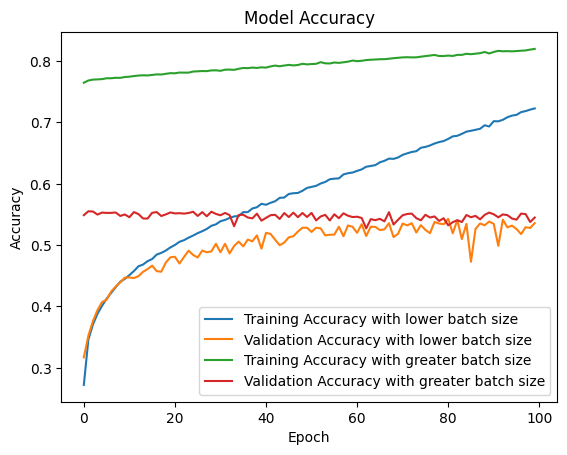

In [ ]:
plt.plot(hist_array[0].history['accuracy'], label='Training Accuracy with lower batch size')
plt.plot(hist_array[0].history['val_accuracy'], label='Validation Accuracy with lower batch size')
plt.plot(hist_array[1].history['accuracy'], label='Training Accuracy with greater batch size')
plt.plot(hist_array[1].history['val_accuracy'], label='Validation Accuracy with greater batch size')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# SGD optimizer, with momentum

In [ ]:
for epoch,batch in [(100,32),(100,256)]:


  model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.99),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
  )


  hist_array.append(model.fit(
    x=x_train,
    y=y_train,
    epochs=epoch,
    batch_size=batch,
    validation_data=(x_test, y_test)
  ))


Epoch 1/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8749 - accuracy: 0.3298 - val_loss: 1.7084 - val_accuracy: 0.3786
Epoch 2/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6904 - accuracy: 0.3890 - val_loss: 1.6430 - val_accuracy: 0.4090
Epoch 3/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6162 - accuracy: 0.4202 - val_loss: 1.5993 - val_accuracy: 0.4249
Epoch 4/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5796 - accuracy: 0.4322 - val_loss: 1.5829 - val_accuracy: 0.4365
Epoch 5/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5512 - accuracy: 0.4414 - val_loss: 1.5806 - val_accuracy: 0.4210
Epoch 6/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5062 - accuracy: 0.4588 - val_loss: 1.5026 - val_accuracy: 0.4647
Epoch 7/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4763 - accuracy: 0.4724 - val_loss: 1.4962 -

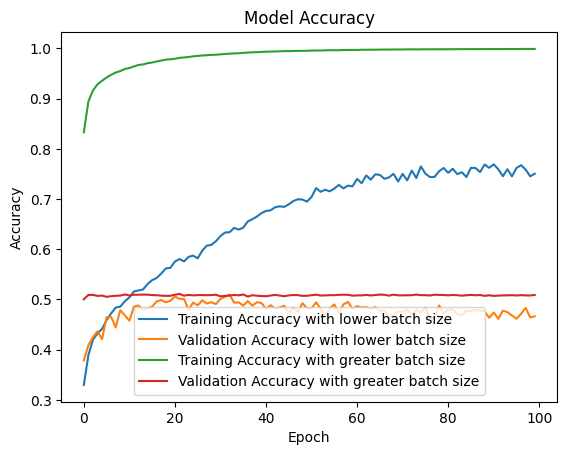

In [ ]:
plt.plot(hist_array[2].history['accuracy'], label='Training Accuracy with lower batch size')
plt.plot(hist_array[2].history['val_accuracy'], label='Validation Accuracy with lower batch size')
plt.plot(hist_array[3].history['accuracy'], label='Training Accuracy with greater batch size')
plt.plot(hist_array[3].history['val_accuracy'], label='Validation Accuracy with greater batch size')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# RMSprop optimizer

In [ ]:
for epoch,batch in [(100,32),(100,256)]:


  model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3, rho=0.9),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
  )


  hist_array.append(model.fit(
    x=x_train,
    y=y_train,
    epochs=epoch,
    batch_size=batch,
    validation_data=(x_test, y_test)
  ))


Epoch 1/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9704 - accuracy: 0.7965 - val_loss: 5.8419 - val_accuracy: 0.4811
Epoch 2/100
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8462 - accuracy: 0.7969 - val_loss: 5.8739 - val_accuracy: 0.4658
Epoch 3/100
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8327 - accuracy: 0.7929 - val_loss: 5.6441 - val_accuracy: 0.4708
Epoch 4/100
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8249 - accuracy: 0.7889 - val_loss: 5.4765 - val_accuracy: 0.4686
Epoch 5/100
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8507 - accuracy: 0.7767 - val_loss: 5.2999 - val_accuracy: 0.4572
Epoch 6/100
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9068 - accuracy: 0.7622 - val_loss: 5.5691 - val_accuracy: 0.4594
Epoch 7/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0225 - accuracy: 0.7300 - val_loss: 5

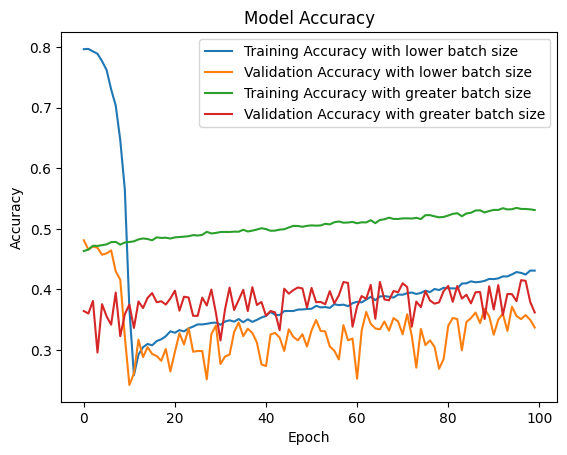

In [ ]:
plt.plot(hist_array[4].history['accuracy'], label='Training Accuracy with lower batch size')
plt.plot(hist_array[4].history['val_accuracy'], label='Validation Accuracy with lower batch size')
plt.plot(hist_array[5].history['accuracy'], label='Training Accuracy with greater batch size')
plt.plot(hist_array[5].history['val_accuracy'], label='Validation Accuracy with greater batch size')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Adam

In [ ]:
for epoch,batch in [(100,32),(100,256)]:


  model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
  )


  hist_array.append(model.fit(
    x=x_train,
    y=y_train,
    epochs=epoch,
    batch_size=batch,
    validation_data=(x_test, y_test)
  ))


Epoch 1/100
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1119 - accuracy: 0.5676 - val_loss: 2.4733 - val_accuracy: 0.3846
Epoch 2/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0812 - accuracy: 0.5732 - val_loss: 2.3820 - val_accuracy: 0.4131
Epoch 3/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0857 - accuracy: 0.5746 - val_loss: 2.3405 - val_accuracy: 0.4113
Epoch 4/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0874 - accuracy: 0.5739 - val_loss: 2.5636 - val_accuracy: 0.4008
Epoch 5/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0756 - accuracy: 0.5761 - val_loss: 2.3973 - val_accuracy: 0.4169
Epoch 6/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0763 - accuracy: 0.5787 - val_loss: 2.4054 - val_accuracy: 0.4004
Epoch 7/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0716 - accuracy: 0.5802 - val_loss: 2

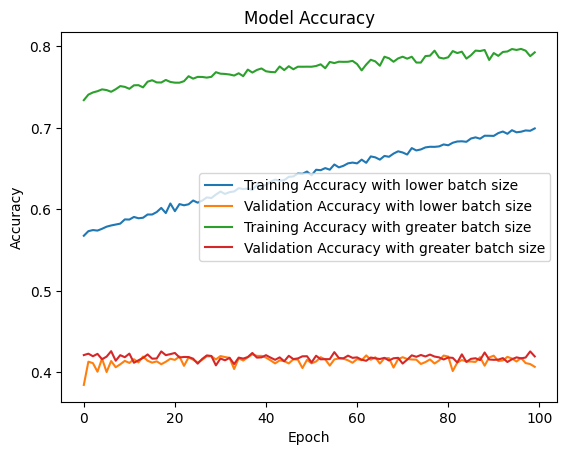

In [ ]:
plt.plot(hist_array[6].history['accuracy'], label='Training Accuracy with lower batch size')
plt.plot(hist_array[6].history['val_accuracy'], label='Validation Accuracy with lower batch size')
plt.plot(hist_array[7].history['accuracy'], label='Training Accuracy with greater batch size')
plt.plot(hist_array[7].history['val_accuracy'], label='Validation Accuracy with greater batch size')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Lion

In [ ]:
for epoch,batch in [(100,32),(100,256)]:


  model.compile(
    optimizer=tf.keras.optimizers.Lion(learning_rate=3e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
  )


  hist_array.append(model.fit(
    x=x_train,
    y=y_train,
    epochs=epoch,
    batch_size=batch,
    validation_data=(x_test, y_test)
  ))


Epoch 1/100
1563/1563 [==============================] - 16s 10ms/step - loss: 2.9692 - accuracy: 0.2604 - val_loss: 2.0265 - val_accuracy: 0.2463
Epoch 2/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.9275 - accuracy: 0.2738 - val_loss: 1.8959 - val_accuracy: 0.2856
Epoch 3/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.8313 - accuracy: 0.3099 - val_loss: 1.8503 - val_accuracy: 0.3211
Epoch 4/100
1563/1563 [==============================] - 15s 9ms/step - loss: 1.7807 - accuracy: 0.3294 - val_loss: 1.8282 - val_accuracy: 0.3244
Epoch 5/100
1563/1563 [==============================] - 15s 9ms/step - loss: 1.7492 - accuracy: 0.3421 - val_loss: 1.8376 - val_accuracy: 0.3208
Epoch 6/100
1563/1563 [==============================] - 15s 9ms/step - loss: 1.7193 - accuracy: 0.3506 - val_loss: 1.8435 - val_accuracy: 0.3122
Epoch 7/100
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6944 - accuracy: 0.3603 - val_loss: 1.767

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



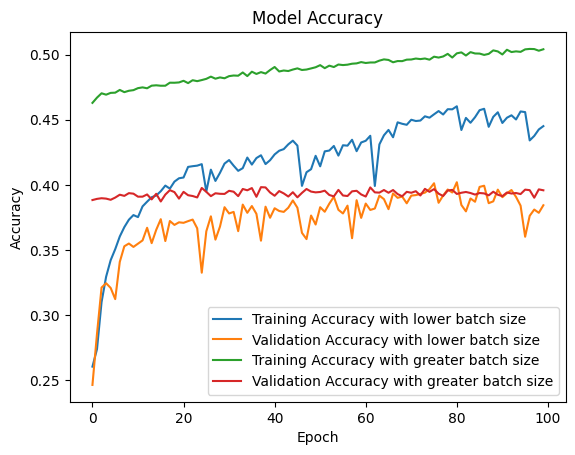

In [ ]:
plt.plot(hist_array[8].history['accuracy'], label='Training Accuracy with lower batch size')
plt.plot(hist_array[8].history['val_accuracy'], label='Validation Accuracy with lower batch size')
plt.plot(hist_array[9].history['accuracy'], label='Training Accuracy with greater batch size')
plt.plot(hist_array[9].history['val_accuracy'], label='Validation Accuracy with greater batch size')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
with open('/content/drive/My Drive/list.pkl', 'wb') as file:
    pickle.dump(hist_array, file)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/list.pkl'

In [ ]:
with open('/content/drive/My Drive/list.pkl', 'rb') as file:
    hist_array = pickle.load(file)


## Results

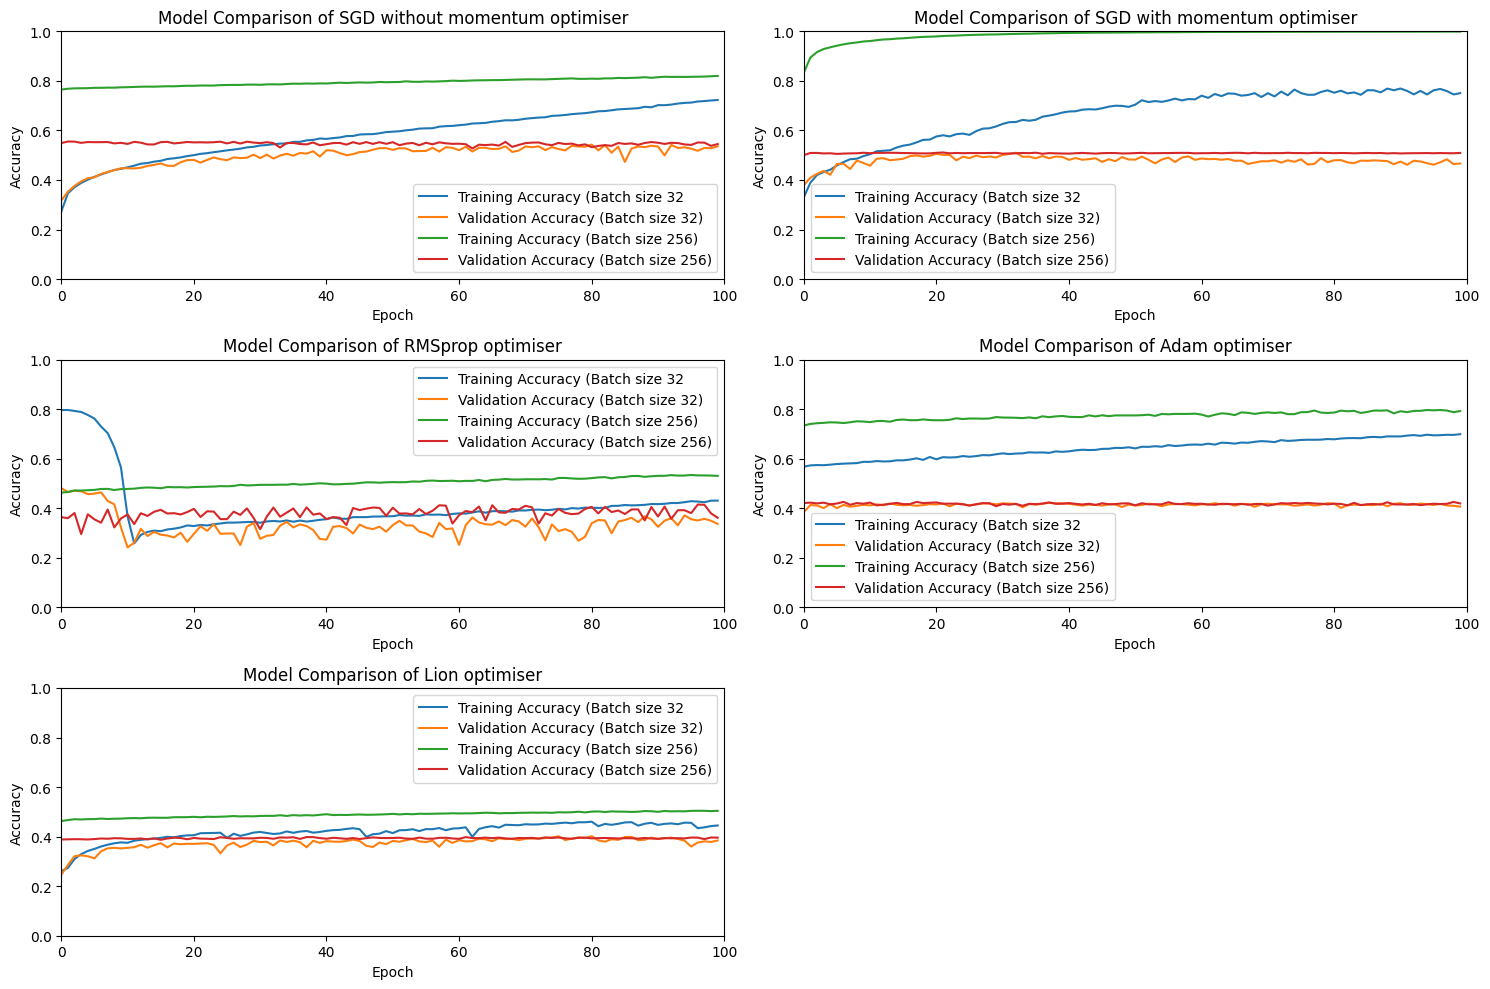

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()
optimisers=['SGD without momentum','SGD with momentum','RMSprop','Adam','Lion']


for i in range(0,9,2):
    ax = axes[i // 2]

    # Plot training and validation accuracy for the current pair
    ax.plot(hist_array[i].history['accuracy'], label=f'Training Accuracy (Batch size 32)')
    ax.plot(hist_array[i].history['val_accuracy'], label=f'Validation Accuracy (Batch size 32)')

    ax.plot(hist_array[i+1].history['accuracy'], label=f'Training Accuracy (Batch size 256)')
    ax.plot(hist_array[i+1].history['val_accuracy'], label=f'Validation Accuracy (Batch size 256)')

    ax.set_title(f'Model Comparison of {optimisers[i//2]} optimiser')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()




    # Set the same x- and y-axis scale for all plots
    ax.set_ylim([0, 1])
    ax.set_xlim([0, 100])




# Remove empty subplots if your total number of plots is not a multiple of the subplot grid size
for j in range(i // 2 + 1, len(axes)):
   fig.delaxes(axes[j])


plt.tight_layout()
plt.show()


1. Всюди оверфіт
2. Обидва SGD на валіді майже не відрізняються, проте наявність моменту дійсно допомагає-- у нас це видно тільна на трейні, але це проблеми архітектури
3. Найгірші результати показує Lion та RMSprop
4. Адам виглядає впевнено на валіді, хоть і погано: можливо він взагалі нікуди не рухається, бо певно мають бути видно хоть якісь стрибки на графіках валіду
5. RMSprop має дуже ламану криву валідів, певно найбільше рухується при пошуках мінімуму
6. Збільшення батч сайзу нічого поганого не робить